In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('Data/Liver.csv')

In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df["Dataset"].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

## Distribution of Numerical Features

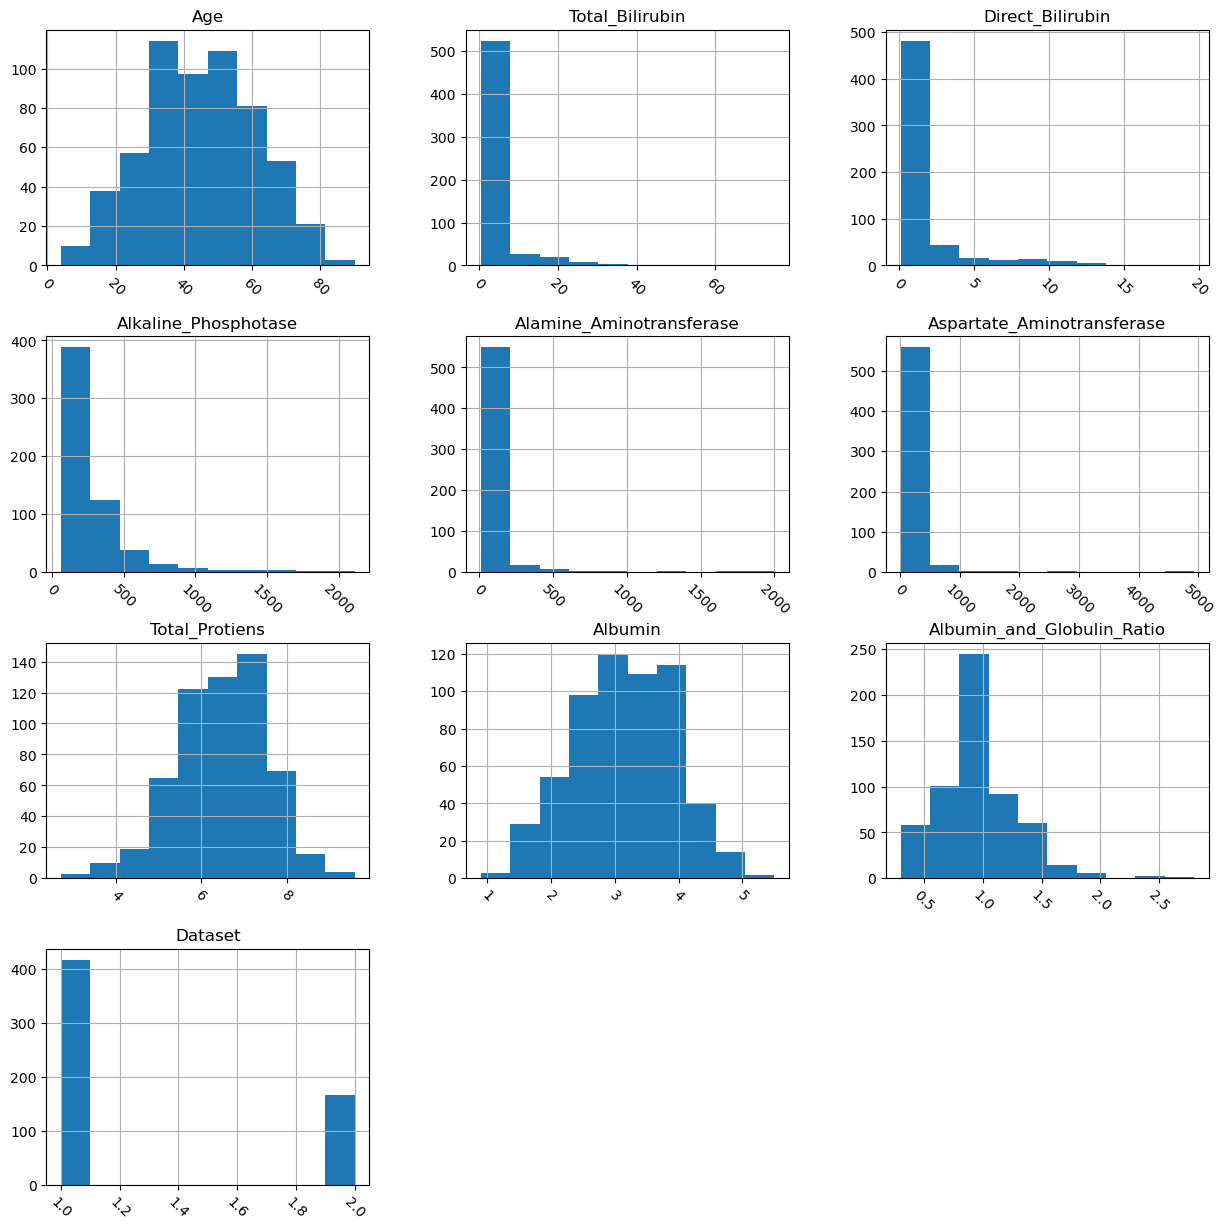

In [8]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [9]:
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

In [10]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Label Male as 0 and Female as 1

In [11]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

In [12]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<Axes: >

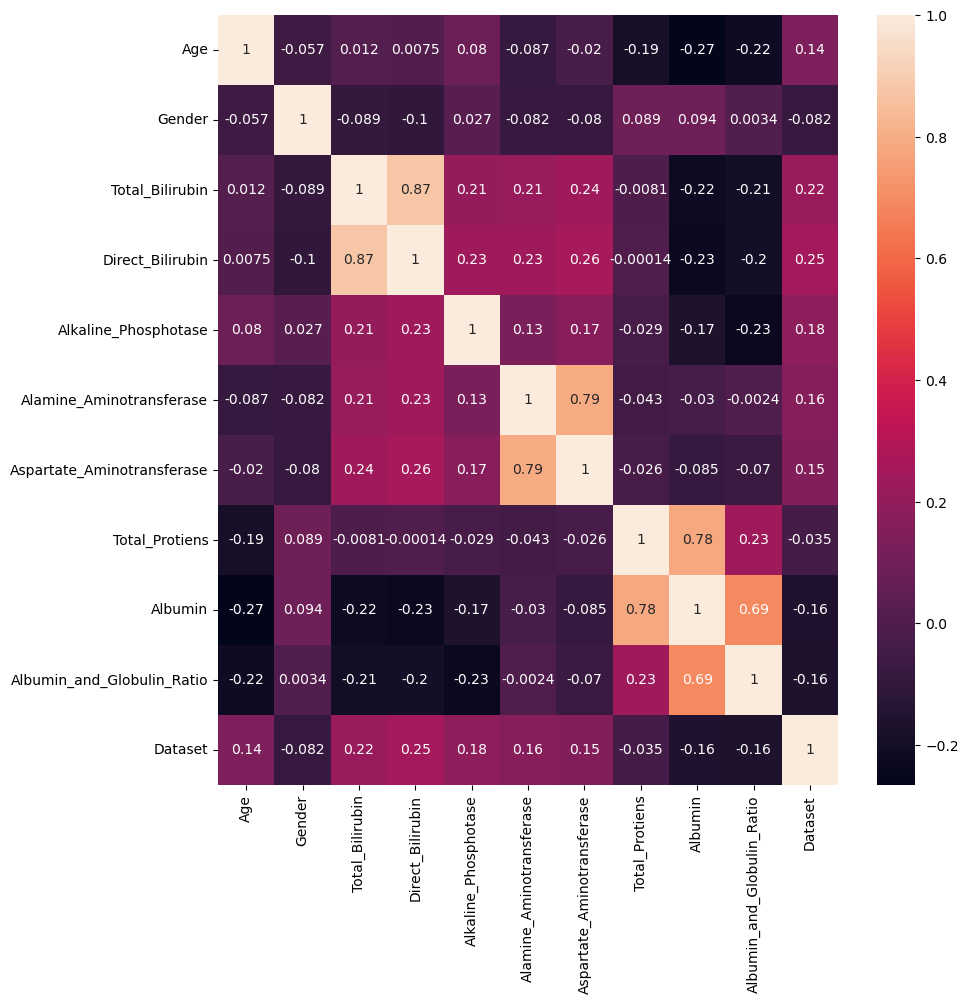

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
print("Before Removing Duplicates",df.shape)
df = df.drop_duplicates()
print("After Removing Duplicates",df.shape)

Before Removing Duplicates (583, 11)
After Removing Duplicates (570, 11)


## Removing Outliers

<Axes: >

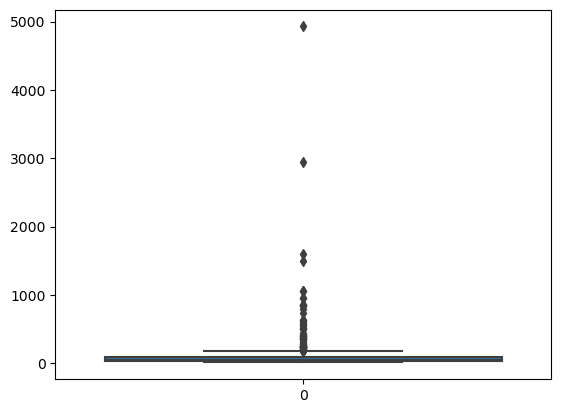

In [15]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [16]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [17]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: >

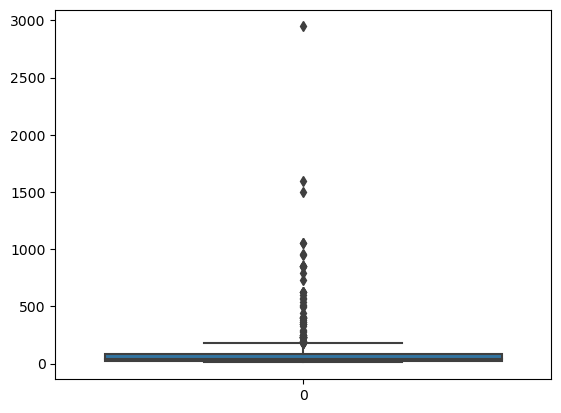

In [18]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [19]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [20]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [21]:
df.isnull().values.any()

True

In [22]:
df=df.dropna(how='any')  

In [23]:
df.shape

(564, 11)

In [24]:
x = df.drop('Dataset', axis=1)

y = df["Dataset"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20,stratify=df.Dataset)

In [26]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(564, 10)
(394, 10)
(170, 10)
(564,)
(394,)
(170,)


In [27]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [28]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return train_accuracy, test_accuracy, precision, recall, f1

In [42]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=7),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,n_estimators=130),
    'Support Vector Machine': SVC(C=0.01, gamma=0.0001, probability=True),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=100),
    'XGB': XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=5, n_estimators=180),
    'KNN':KNeighborsClassifier()
}

In [43]:
best_model_name = None
best_test_accuracy = 0
results_dict = {'Model': [], 'Training Accuracy': [], 'Testing Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in models.items():
    train_accuracy, test_accuracy, precision, recall, f1 = evaluate_model(model, x_train, y_train, x_test, y_test)

    results_dict['Model'].append(model_name)
    results_dict['Training Accuracy'].append(train_accuracy)
    results_dict['Testing Accuracy'].append(test_accuracy)
    results_dict['Precision'].append(precision)
    results_dict['Recall'].append(recall)
    results_dict['F1 Score'].append(f1)

    print(f"Model: {model_name}")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("=" * 35)

    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_model_name = model_name
        
print(f"The best model based on testing accuracy is {best_model_name} with Testing Accuracy: {best_test_accuracy}")

Model: Logistic Regression
Training Accuracy: 0.751269035532995
Testing Accuracy: 0.6941176470588235
Precision: 0.7225806451612903
Recall: 0.9256198347107438
F1 Score: 0.8115942028985507
Model: Decision Tree
Training Accuracy: 0.7614213197969543
Testing Accuracy: 0.6882352941176471
Precision: 0.7098765432098766
Recall: 0.9504132231404959
F1 Score: 0.8127208480565371
Model: Random Forest
Training Accuracy: 0.9390862944162437
Testing Accuracy: 0.6764705882352942
Precision: 0.72
Recall: 0.8925619834710744
F1 Score: 0.7970479704797049
Model: Support Vector Machine
Training Accuracy: 0.7131979695431472
Testing Accuracy: 0.711764705882353
Precision: 0.711764705882353
Recall: 1.0
F1 Score: 0.831615120274914
Model: Naive Bayes
Training Accuracy: 0.5406091370558376
Testing Accuracy: 0.5823529411764706
Precision: 0.9807692307692307
Recall: 0.4214876033057851
F1 Score: 0.5895953757225433
Model: Gradient Boosting
Training Accuracy: 0.934010152284264
Testing Accuracy: 0.6823529411764706
Precision: 

In [44]:
import pickle
best_model = models[best_model_name]
# Save the best model to a file
pickle.dump(best_model, open('Liver_Model.pkl', 'wb'))
pickle.dump(scaler, open('Liver_Preprocessor.pkl', 'wb'))